In [1]:
from SLiCAPnotebook import *
# Always run SLiCAP from the project directory, this will use the correct path settings.
t1=time()

In [2]:
prj = initProject('My first SLiCAP project') # Sets all the paths and creates the HTML main index page.

fileName = 'PIVA.cir'
i1 = instruction()                           # Creates an instance of an instruction object
i1.setCircuit(fileName)                      # Checks and defines the local circuit object and
                                             # sets the index page to the circuit index page

i1.defPar('C_ph', '2.95p')                   # Correct value for frequency compenmsation

# Generate HTML report.                          
htmlPage('Circuit data')                     # Creates an HTML page and a link on the index page of this circuit

No errors found for circuit: 'PIVA' from file: 'PIVA.cir'.



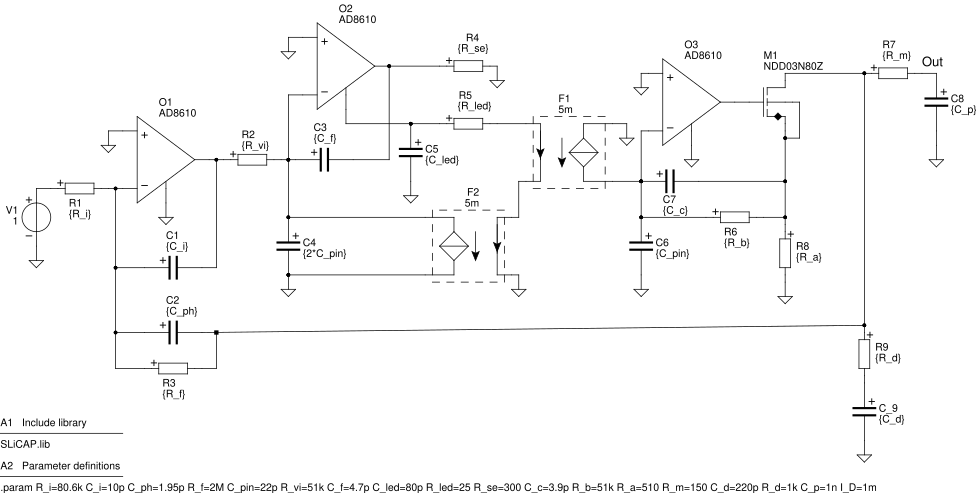

In [3]:
SVG(filename=img2html('PIVA.svg', 800))

In [4]:
HTML(netlist2html(fileName, label = 'netlist'))

In [5]:
HTML(elementData2html(i1.circuit, label = 'elementData'))

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,7 4,,C,value,$$C_{i}$$,$$1.0 \cdot 10^{-11}$$
C2,7 9,,C,value,$$C_{ph}$$,$$2.95 \cdot 10^{-12}$$
C3,1 5,,C,value,$$C_{f}$$,$$4.7 \cdot 10^{-12}$$
C4,1 0,,C,value,$$2 C_{pin}$$,$$4.4 \cdot 10^{-11}$$
C5,2 0,,C,value,$$C_{led}$$,$$8.0 \cdot 10^{-11}$$
C6,10 0,,C,value,$$C_{pin}$$,$$2.2 \cdot 10^{-11}$$
C7,10 6,,C,value,$$C_{c}$$,$$3.9 \cdot 10^{-12}$$
C8,Out 0,,C,value,$$C_{p}$$,$$1.0 \cdot 10^{-9}$$
C_9,13 0,,C,value,$$C_{d}$$,$$2.2 \cdot 10^{-10}$$
Cc1_O1,0 0,,C,value,$$4.0 \cdot 10^{-12}$$,$$4.0 \cdot 10^{-12}$$


In [6]:
HTML(params2html(i1.circuit, label = 'params'))

Name,Symbolic,Numeric
$$C_{c}$$,$$3.9 \cdot 10^{-12}$$,$$3.9 \cdot 10^{-12}$$
$$C_{d}$$,$$2.2 \cdot 10^{-10}$$,$$2.2 \cdot 10^{-10}$$
$$C_{f}$$,$$4.7 \cdot 10^{-12}$$,$$4.7 \cdot 10^{-12}$$
$$C_{i}$$,$$1.0 \cdot 10^{-11}$$,$$1.0 \cdot 10^{-11}$$
$$C_{led}$$,$$8.0 \cdot 10^{-11}$$,$$8.0 \cdot 10^{-11}$$
$$C_{p}$$,$$1.0 \cdot 10^{-9}$$,$$1.0 \cdot 10^{-9}$$
$$C_{ph}$$,$$2.95 \cdot 10^{-12}$$,$$2.95 \cdot 10^{-12}$$
$$C_{pin}$$,$$2.2 \cdot 10^{-11}$$,$$2.2 \cdot 10^{-11}$$
$$I_{D}$$,$$0.001$$,$$0.001$$
$$R_{a}$$,$$510$$,$$510.0$$


In [7]:
i1.setGainType ('vi')
i1.setSimType('symbolic')
i1.setDataType('matrix')
i1.setSource('V1')
i1.setDetector(['V_Out', 'V_0'])
matrixResult = i1.execute()

In [8]:
htmlPage('Symbolic matrix representation')

In [9]:
HTML(matrices2html(matrixResult));

In [10]:
htmlPage('Poles and zeros')

In [11]:
i1.setSimType('numeric')
i1.setGainType('gain')
i1.setLGref('F1')
i1.setDataType('poles')
polesResult = i1.execute()
HTML(pz2html(polesResult, label = 'tab_poles'))

pole,Re [Hz],Im [Hz],Mag [Hz],Q
p1,-4.235e+4,-2.544e+4,4.940e+4,0.5833
p2,-4.235e+4,2.544e+4,4.940e+4,0.5833
p3,-4.997e+5,-5.114e+5,7.150e+5,0.7154
p4,-4.997e+5,5.114e+5,7.150e+5,0.7154
p5,-7.742e+5,,7.742e+5,
p6,-9.328e+5,-8.238e+5,1.245e+6,0.6671
p7,-9.328e+5,8.238e+5,1.245e+6,0.6671
p8,-7.149e+6,,7.149e+6,
p9,-1.465e+7,-1.680e+7,2.229e+7,0.7610
p10,-1.465e+7,1.680e+7,2.229e+7,0.7610


In [12]:
i1.setDataType('zeros')
zerosResult = i1.execute()
HTML(pz2html(zerosResult, label = 'tab_zeros'))

zero,Re [Hz],Im [Hz],Mag [Hz],Q
z1,-7.234e+5,,7.234e+5,
z2,2.833e+6,,2.833e+6,
z3,1.419e+6,-2.916e+6,3.243e+6,1.143
z4,1.419e+6,2.916e+6,3.243e+6,1.143
z5,-2.171e+6,-3.373e+6,4.011e+6,0.9240
z6,-2.171e+6,3.373e+6,4.011e+6,0.9240
z7,-4.311e+6,,4.311e+6,
z8,-2.470e+7,,2.470e+7,
z9,-7.568e+7,,7.568e+7,
z10,-1.079e+8,,1.079e+8,


In [13]:
i1.setDataType('pz')
pzResult = i1.execute()
HTML(pz2html(pzResult, label = 'tab_pz'))

pole,Re [Hz],Im [Hz],Mag [Hz],Q
p1,-4.235e+4,-2.544e+4,4.940e+4,0.5833
p2,-4.235e+4,2.544e+4,4.940e+4,0.5833
p3,-4.997e+5,-5.114e+5,7.150e+5,0.7154
p4,-4.997e+5,5.114e+5,7.150e+5,0.7154
p5,-7.742e+5,,7.742e+5,
p6,-9.328e+5,-8.238e+5,1.245e+6,0.6671
p7,-9.328e+5,8.238e+5,1.245e+6,0.6671
p8,-7.149e+6,,7.149e+6,
p9,-1.465e+7,-1.680e+7,2.229e+7,0.7610
p10,-1.465e+7,1.680e+7,2.229e+7,0.7610


In [14]:
htmlPage('Denominator, nominator, transfer function and step response')

In [15]:
i1.setDataType('denom')
denom = i1.execute().denom
HTML(eqn2html('D_s', denom))

In [16]:
i1.setDataType('numer')
numer = i1.execute().numer
HTML(eqn2html('N_s', numer))

In [17]:
i1.setDataType('laplace')
result = i1.execute()
Fs     = result.laplace
HTML(eqn2html('F_s', Fs))

In [18]:
transferCoeffs      = coeffsTransfer(Fs)
HTML(coeffsTransfer2html(transferCoeffs))

order,coefficient
$$0$$,$$1$$
$$1$$,$$2.147 \cdot 10^{-7}$$
$$2$$,$$-1.302 \cdot 10^{-15}$$
$$3$$,$$-3.492 \cdot 10^{-23}$$
$$4$$,$$-2.651 \cdot 10^{-30}$$
$$5$$,$$-4.762 \cdot 10^{-37}$$
$$6$$,$$-4.661 \cdot 10^{-44}$$
$$7$$,$$-2.324 \cdot 10^{-51}$$
$$8$$,$$-2.708 \cdot 10^{-59}$$
$$9$$,$$-1.302 \cdot 10^{-67}$$


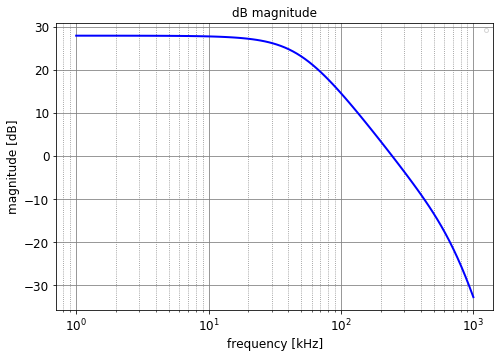

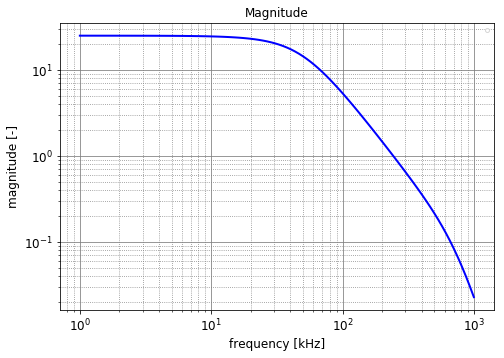

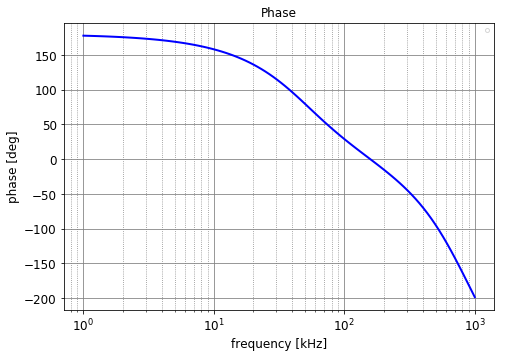

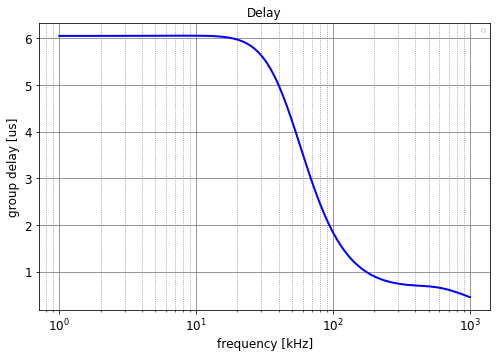

In [19]:
# Frequency-domain plots
figdBmag = plotSweep('dBmag', 'dB magnitude', result, 1, 1e3, 100, sweepScale = 'k', funcType = 'dBmag', show = True)
figMag   = plotSweep('mag', 'Magnitude', result, 1, 1e3, 100, sweepScale = 'k', funcType = 'mag', yUnits = '-', show = True)
figPhase = plotSweep('phase', 'Phase', result, 1, 1e3, 100, sweepScale = 'k', funcType = 'phase', show = True)
figDelay = plotSweep('delay', 'Delay', result, 1, 1e3, 100, sweepScale = 'k', yScale = 'u', funcType = 'delay', show = True)

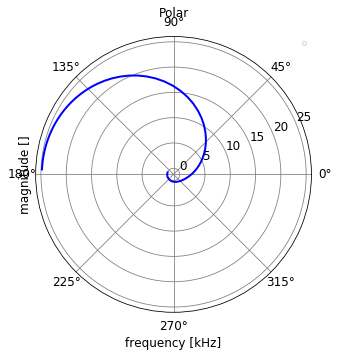

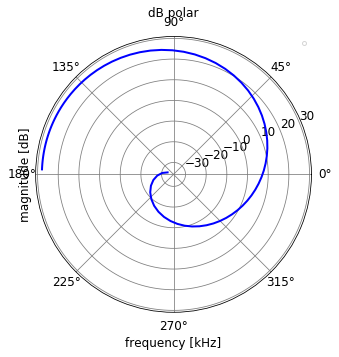

In [20]:
# Polar plots
figPolar   = plotSweep('polar', 'Polar' , result, 1, 1e3, 100, sweepScale = 'k', axisType = 'polar', funcType = 'mag', show = True)
figdBpolar = plotSweep('dBpolar', 'dB polar' , result, 1, 1e3, 100, funcType = 'dBmag', sweepScale = 'k', axisType = 'polar', show = True)

In [21]:
i1.setGainType('asymptotic')
asymptotic = i1.execute()
i1.setGainType('loopgain')
loopgain = i1.execute()
# Let us calculate the phase margin
print phaseMargin(loopgain.laplace)

(61.10393765092847, 79125.51585111124)


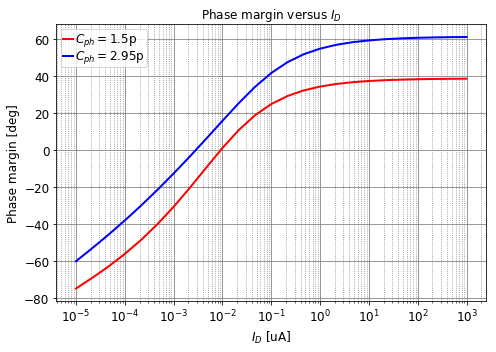

In [22]:
# Let us plot the phase margin as a function of circuit parameters
i1.setStepVar('I_D')
i1.setStepMethod('log')
i1.setStepNum(25)
i1.setStepStart('10p')
i1.setStepStop('1m')
i1.stepOn()
loopgainStepped = i1.execute()
# Trace data for phase margin with C_ph = 2.95pF
# x data is values of step parameter, y data is phase margin
PM2p95 = [i1.stepList, phaseMargin(loopgainStepped.laplace)[0]]
# Trace data for phase margin with C_ph = 1.5pF
i1.defPar('C_ph', '1.5p')
loopgainStepped_1p5 = i1.execute()
# x data is values of step parameter, y data is phase margin
PM1p5 = [i1.stepList, phaseMargin(loopgainStepped_1p5.laplace)[0]]
plotData = {'$C_{ph}=2.95$p': PM2p95, '$C_{ph}=1.5$p': PM1p5}
figPM = plot('PM', 'Phase margin versus $I_D$', 'semilogx', plotData, xName = '$' + sp.latex(i1.stepVar) + '$', xScale = 'u', xUnits = 'A', yName = 'Phase margin', yUnits = 'deg', show = True)

In [23]:
# Calculate the remaining transfers of the asysmptotic gain model
i1.defPar('C_ph', '2.95p')
i1.stepOff()
i1.setGainType('servo')
servo = i1.execute()
i1.setGainType('direct')
direct = i1.execute()

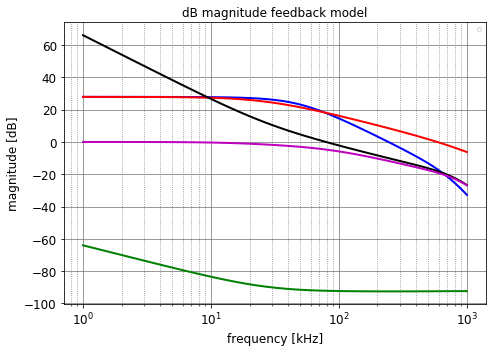

In [24]:
# Bode plots of the asymptotic-gain feedback model parameters
figdBmagA = plotSweep('magA', 'dB magnitude feedback model', [result, asymptotic, loopgain, servo, direct], 1, 1e3, 100, funcType = 'dBmag', sweepScale = 'k', show = True)

In [25]:
i1.setDataType('step')
i1.setGainType('gain')
stepResult = i1.execute()
a_t        = stepResult.stepResp
HTML(eqn2html('a_t', a_t))

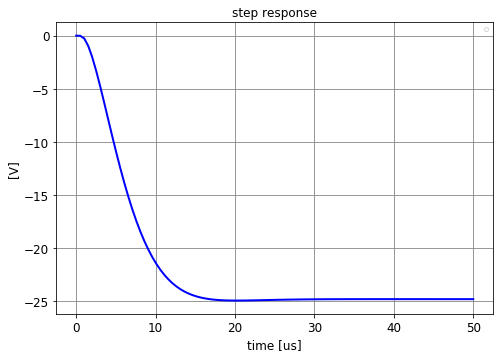

In [26]:
# Time-domain plot
figStep = plotSweep('step', 'step response', stepResult, 0, 50, 100, sweepScale = 'u', yUnits = 'V', show = True)

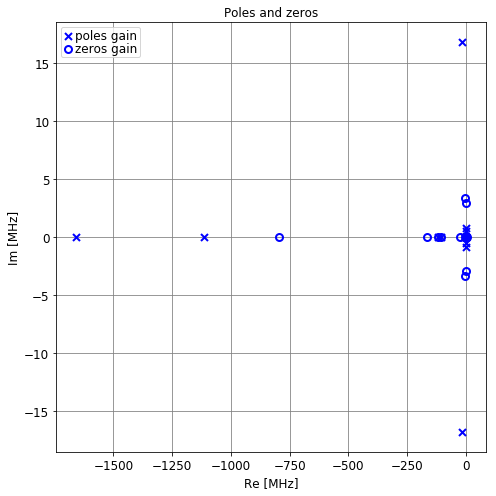

In [27]:
i1.setGainType('gain')
i1.setDataType('pz')
figPZ = plotPZ('PZ', 'Poles and zeros', pzResult, xmin = -100, xscale = 'M', yscale = 'M', show = True)

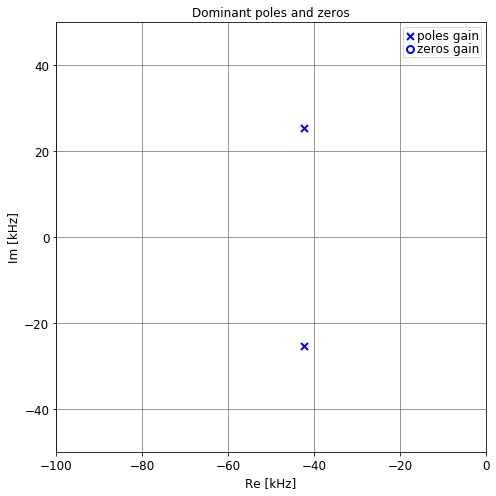

In [28]:
figPZd = plotPZ('PZd', 'Dominant poles and zeros', pzResult, xmin = -100, xmax = 0, ymin = -50, ymax = 50, xscale = 'k', yscale = 'k', show = True)

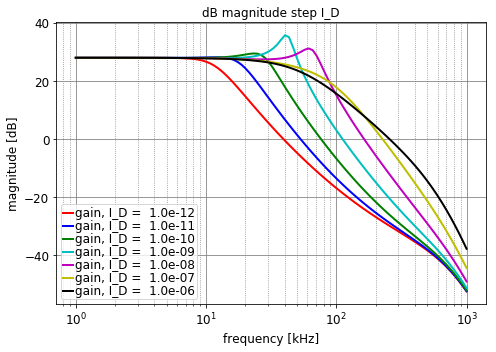

In [29]:
# Plots with graphs of asymptotic-gain feedback model transfers
i1.setGainType('gain')
i1.setDataType('laplace')
i1.setStepVar('I_D')
i1.setStepMethod('log')
i1.setStepNum(7)
i1.setStepStart('1p')
i1.setStepStop('1u')
i1.stepOn() 
FsStepped = i1.execute()
figdBs = plotSweep('dBs', 'dB magnitude step I_D', FsStepped, 1, 1e3, 100, funcType = 'dBmag', sweepScale = 'k', show = True)

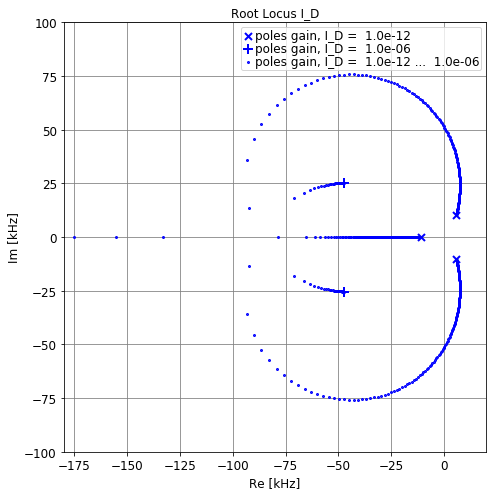

In [30]:
# Root-locus plot
i1.setDataType('poles')
i1.setStepNum(200)
polesStepped = i1.execute()
figRL = plotPZ('RL', 'Root Locus I_D', polesStepped, xmin = -180, xmax = 20, ymin = -100, ymax = 100, xscale = 'k', yscale = 'k', show = True)

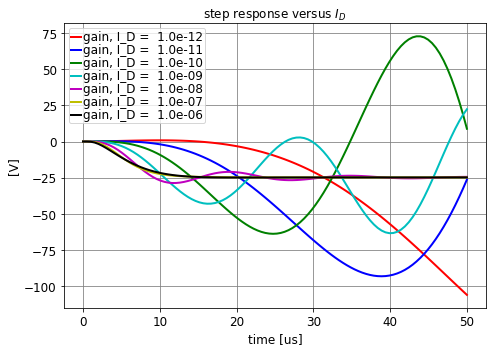

In [31]:
# Step responses as a function of I_D
i1.setDataType('step')
i1.setStepNum(7)
a_tStepped = i1.execute()
figStepped = plotSweep('stepped', 'step response versus $I_D$', a_tStepped, 0, 50, 100, sweepScale = 'u', yUnits = 'V', show=True)

In [32]:
htmlPage('Plots')
fig2html(figdBmag, 600, label = 'figdBmag',  caption='dB magnitude plot of the PIVA transfer.')
fig2html(figMag, 600, label = 'figMag', caption='Magnitude plot of the PIVA transfer.')
fig2html(figPhase, 600, label = 'figPhase', caption='Phase plot of the PIVA transfer.')
fig2html(figDelay, 600, label = 'figDelay', caption='Group delay of the PIVA transfer.')
fig2html(figdBmagA, 600, label = 'figdBmagA', caption='Asymptotic-gain model parameter dB magnitude plots of the PIVA transfer.')
fig2html(figPM, 600, label = 'figPM', caption='Phase margin versus drain current for different values of the phantom zero capacitance.')
fig2html(figPolar, 600, label = 'figPolar', caption ='Polar plot of the PIVA transfer.')
fig2html(figdBpolar, 600, label = 'figdBpolar', caption ='dB polar plot of the PIVA transfer.')
fig2html(figStep, 600, label = 'figStep', caption='Unit step response of the PIVA.')
fig2html(figStepped, 600, label = 'figStepped', caption='Unit step response of the PIVA versus $I_D$.')
fig2html(figPZ, 600, label = 'figPZ', caption='Poles and zeros of the gain of the PIVA.')
fig2html(figPZd,  600, label = 'figPZd', caption='Dominant poles of the gain of the PIVA.')
fig2html(figdBs, 600, label = 'figdBs', caption='dB magnitude plot of the PIVA transfer for different values of the drain current.')
fig2html(figRL, 600, label = 'figRL', caption='Poles of the gain for different values of the drain current.');

In [33]:
links2html()
t2=time()
print '\nTotal time: %3.1fs'%(t2-t1)


Total time: 50.4s
